In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

<h1>
   <font size="5" color='#1a092b'>
     The softmax function.Optimization problem in Cross-entropy Loss
   </font> 
    <br> 
</h1>
<h6>
  <font size="4" color='#310959'>
    &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; How the Softmax works? <br> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; Which is used as an error function in Softmax regression?  <br> <br>
         &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; How we can find a maths expression of Gradient descent used in Cross-entropy Loss ? <br>     
   </font>
</h6> 
   <br><br><br>
<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" >
    </a>
    <font size="4"  color='1a092b'>
        author: daodeiv (David Stankov) 
    </font>
</p>      
<br> <br> <br>
</h2>   
<h7>
   <font size="2" color='#310959' >
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; This paper contains a mathematical proof and implementation of Gradient Descent expression used as optimization alogithm in Cross-entropy Loss. We will use the Cross-entropy Loss or so-called Softmax Loss as an error function in the process of fitting estimator parameters(weights) in Softmax function. This notebook is focused on the mathematics behind softmax regression rather than its application in multi-class classification.In addition, there is an example of training data in order to represent a litle of practical part of Softmax regression.
  </font>
</h7>

      

<h1>
   <font size="3" color='#310959'>
       &nbsp;&nbsp;&nbsp; The standart softmax function $\sigma: \; \Re^k \; \rightarrow \; \Re^k $ is defined by formula : <br>
  </font>   
  <br>
  <font size="5" color='#4a3e20' >
    $$\sigma(z)_i=\phi_{softmax (z)_i}=\frac{e^z_i}{\sum_{j=1}^n e^{z}_{j}}$$  
  </font>
  <br>
  <font size="3" color='#310959' > 
  The softmax function  takes as an input a vector $\vec z$ with $K$ number of component, and normalized it into  a  probability distribution consisting of  $K$ number of probabilities proportional to exponentials of input values.That is, prior to applying softmax function some vector components could be negative or greater than one and  might not sum up to 1.
Furthermore more the larger input components correspond to larger probabilities. 
  </font>    
</h1>    

 <h6> <font size="3" color='#310959'>  $\; \; $ Before we getting deeper into the above equation, we gonna generate our learning data. The data consist of records contains different types of vehicle together with their physical sizes. Since our purpose is to diving into the concepts of Softmax (not to show great predictions) the dataset is very simple and we would be able to do prediction using only the power of our brain without any ML algorithms. The simplicity of the dataset will help us to easier understand the math concepts behind softmax easier. 
    </font> 
  </h6>
<br>
<h1>
<font size="3" color='#310959'>
        &nbsp;&nbsp; Let to generate the training data : <br>
</font>    
</h1>  

In [3]:
#generate  records refer to tractor label with random physical size between [4,5] 
tractor_dataframe= pd.DataFrame(data=np.random.random((30, 3))+3,columns = ['x_size','y_size','z_size'])
tractor_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Tractor').T)

#generate  records refer to car label with random physical size between [1,2]  
car_dataframe= pd.DataFrame(data=np.random.random((30, 3)) + 1,columns = ['x_size','y_size','z_size'])
car_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Car').T)

#generate  records refer to car label with random physical size between [2,3]  
bus_dataframe= pd.DataFrame(data=np.random.random((30, 3))+2,columns = ['x_size','y_size','z_size'])
bus_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Bus').T)

# joint each data frame into  one
data = tractor_dataframe.append(bus_dataframe).append(car_dataframe)
data = pd.get_dummies(data) 
data

,x_size,y_size,z_size,label_Bus,label_Car,label_Tractor
0,3.702559,3.065758,3.115231,0,0,1
1,3.929419,3.715173,3.468602,0,0,1
2,3.718284,3.799914,3.175256,0,0,1
3,3.131624,3.193786,3.931607,0,0,1
4,3.005559,3.023722,3.924982,0,0,1
...,...,...,...,...,...,...
25,1.618569,1.771616,1.741405,0,1,0
26,1.525551,1.605327,1.093550,0,1,0
27,1.939387,1.640885,1.073942,0,1,0
28,1.385039,1.505721,1.424187,0,1,0


<h1>
<font size="3" color='#310959'>
&nbsp;&nbsp; The label values label_car, label_bus, and label_tractor are represented as one-hot encoding variable (dummies) in order to be used in mathematical manipulation.
<br> <br>
  &nbsp;&nbsp;Let to visualize the data  using  Scatter plot :  
</font>    
</h1>   

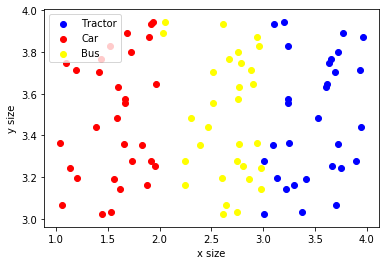

In [4]:
plt.scatter(tractor_dataframe['x_size'],tractor_dataframe['y_size'],label='Tractor',color='blue')
plt.scatter(car_dataframe['x_size'],tractor_dataframe['y_size'],label='Car',color='red')
plt.scatter(bus_dataframe['x_size'],tractor_dataframe['y_size'],label='Bus',color='yellow')
plt.xlabel('x size')
plt.ylabel('y size')
plt.legend()

In [5]:
x_train = np.array(data.drop(['label_Bus','label_Car','label_Tractor'], axis = 1)) # gets the target label variables
y_train = np.array(data[['label_Bus','label_Car','label_Tractor']]) # gets feature variables 
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=42) #separats into test and train samples 

print('shape of x train (m, n)', X_train.shape)
print('shape of y label (m, k)', y_train.shape )

shape of x train (m, n) (60, 3)
shape of y label (m, k) (60, 3)


<h1>
  <br>
<font size="3" color='#310959'>     
 &nbsp;&nbsp; The dataset consist of $X^{m\times n}$ features vectors and $Y^{m\times  k}$ target (class) vectors.
    Where $m = 60$ (observations), $n=3$ attributes (predictors), (k=3) target(class) variables. For example, $y_{32}=2$ that means a record 3 $x_{3i} $ belongs to class 2(Car). <br>
    Given our data, the softmax function will be written as  : <br>
</font>
</h1>


<font size="3" color='#4a3e20' >
   $$(1) \; \; \; \; \; \;p_{ij}=\phi_{softmax (z)_{ij}}=\frac{e^{z_{ij}}}{\sum_l^k e^{z_{il}}} $$ <br>
            $$\; \; \;z_{ij} = \sum_p^3 x_{ip} w_{jp} + b_j $$
  </font>            

<h1>
<font size="3" color='#310959'>    
     &nbsp;&nbsp; where $w_{jp}\in W$ .$W$ is an weght matrix, where $w_{jp}$ is the estimators the prediction process of softmax function is based on $w_{jp}$.Acording to our dataset $W^{jp}=W^{33}$ because the dataset have $n=3$ attributes (predictors) , (k=3) class  <br> and $b_j $ is bias for vector, 
  </font>
 <br> <br> 
    <font size="3" color='#4a3e20' >  <br> 
      &nbsp;&nbsp;&nbsp;&nbsp;   $ W= \begin{bmatrix} weight^1\rightarrow class \; 1(bus) \\ weight^2\rightarrow class\;  2(car) \;   \\ weight^{3}\rightarrow class \;3(tractor) \;  \end{bmatrix} =
    \begin{bmatrix} \vec w^1 \\  \vec w^2\  \\ \vec w^3  \end{bmatrix} =\begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix}  $ &nbsp;&nbsp;&nbsp;&nbsp;    $ B= \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}\;\;\;$
   </font>
   <br> <br> 
  <font size="3" color='#310959'>  
 &nbsp;&nbsp; vector $\vec w^1=[w_{11},w_{12},w_{13}]=w^{1j}$ is estimator vecotor for class 1 (bus), and $w_{12}$ is related to $x_{m2}$ attribute(predictor), written in matrix form : <br> <br>
   </font>
  </h1>  

<h1>
 <font size="3" color='#4a3e20' >  <br> 
  &nbsp;&nbsp;&nbsp;&nbsp;  $Z = XW^T$ 
  &nbsp;&nbsp;&nbsp;&nbsp;  $Z = 
    \begin{bmatrix} x_{11} &  x_{12} & x_{13} \\  x_{21} &  x_{22} & x_{23} \\ ... & ... & ... \\ x_{n1} &  x_{n2} & x_{n3} \end{bmatrix} \times \begin{bmatrix} w_{11} & w_{21} & w_{31}  \\ w_{12} & w_{22} & w_{32} \\  w_{13} & w_{23} & w_{33}\end{bmatrix} + \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}  =   \begin{bmatrix} z_{11} &  z_{12} & z_{13} \\  z_{21} &  z_{32} & z_{33} \\ ... & ... & ...  \\ z_{n1} &  z_{n2} & z_{n3}  \end{bmatrix} $ <br>   
   </font>
</h1>   


<h1>
   <font size="3" color='#310959'>  
   &nbsp;&nbsp; The softmax function computes the probability that a training example $x^{(i)}=x_{in}$  belongs to class $y^{j}$ given 
    the weight  matrix $W$ and bias $\vec b$ . <br> 
    So we compute the probability : 
  </font>
  <font size="3" color='#4a3e20' >
      $$p_{ij}=P(y=j | x^{(i)};W) = \phi_{softmax (z)_{ij}}=\frac{e^{z_{ij}}}{\sum_l^k e^{z_{il}}} $$
   </font>   
     
   
</h1>    

<h1>
<font size="3" color='#4a3e20' >
   $ \phi_{softmax} = P = \begin{bmatrix} p(y=1 |x^{1} ; W )_{11} &  p(y=2 |x^{1} ; W )_{12}  &  p(y=3 |x^{1} ; W )_{13} 
        \\ ... &  ...  & ...
        \\ P(y=1 |x^{m} ; W ) &  P(y=2 |x^{m} ; W )  & P(y=3 |x^{m} ; W )
        \end{bmatrix} = 
        \begin{bmatrix} \frac{e^{z_{11}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{12}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{13}}}{\sum_{1j}e^{z_{1j}}} 
        \\   \\ ... & ... & ...  \\
        \\    \frac{e^{k_{n1}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n2}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n3}}}{\sum_{j}^3e^{z_{nj}}}\end{bmatrix} $
</h1>        

 <h1>
 <font size="3" color='#310959'>  
  for example, the probability record one $x^1$ from dataset to belongs to class  $y_2$ (car) we be calculated as:
  </font>
  <br> <br> 
  <font size="3" color='#4a3e20' >
     $$p_{12} =P(y=2 |x^{1};\; W ) = \frac{ e^{ ^{z_{12}} } }{ \sum_p^3 e^{z_{1p}}}=\frac{ e^{ (^{\sum_v^3 x_{1v}.w_{vj} + b_v }} )}{ \sum_p^3 e^{ ^ ({\sum_v^3 x_{1v}.w_{2v}} + b_2})}$$
</h1>
 <h1>
 <font size="3" color='#310959'>  
   &nbsp;&nbsp; Due to denominator $\sum_v^3 x_{1v}.w_{2v} + b_2$ always the  $p_{12}=\frac{e^{z_{ij}}}{\sum_l^k e^{z_{il}}}\in [0,1]$
     and to all $p_{ij} $ as well.
  </font>
 </h1>    

<h1>
 <font size="3" color='#310959'>  
    &nbsp;&nbsp; Let to see how the softmax function  can be applied concretely in our training dataset :
             First, let to define a weight matrix $W$ and bias $\vec b$ <br> <br>
 <font>  
     <br> <br>
  <font size="3" color='#4a3e20' >
   &nbsp;&nbsp;    $W = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33}                      \end{bmatrix} 
                   =  \begin{bmatrix} 0.75776811 & 0.6690284 & -0.02646755 \\
                                     -2.94775864 &  -3.06439323 & -2.14043833\\
                                      2.18999053 & 2.39536483 &  2.16690588 \end{bmatrix}$
     &nbsp;&nbsp; $B = \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix} = \begin{bmatrix}  -0.15425504 \\ 18.81781451 \\ -18.66355947 \end{bmatrix} $
  </font>     

</h1>
       

<h5>  
  <font size="3" color='#310959'>  
   &nbsp;&nbsp; I've prepared weight vector $W$ and bias $B$ in advance, how? We will see later. <br> <br>
   </font>
</h5>   

In [6]:
W = np.array([[ 0.75776811,  0.6690284 , -0.02646755],
              [-2.94775864, -3.06439323, -2.14043833],
              [ 2.18999053 , 2.39536483,  2.16690588]]) # define a weight matrix

B = intercept = np.array([ -0.15425504 , 18.81781451, -18.66355947])  #bias vector (intercept) 

In [7]:
def softmax(X, W, B):
    '''
    softmax function  
    takes :
    X = training data
    W =  weight matrix
    b = bias vector (intercept) 
    return :
      softmax for every z unit e^{k_ij}/Sum(e^{k_i1}+e^{k_i2}+e^{k_i3})
    '''
    #dot product between X_data matrix  and tranposed Weight_ matrix added to Bias  gives matrix each z_ij
    Z = X.dot(W.T)+B 
    
    #return matrix cosist of exponentials Z input net
    exp_z = np.exp(X.dot(W.T)+B)
    
    #array contains sum  of every row  (e^z_{ik})
    sums=np.sum(exp_z, axis=1) 
    
    #return softmax(Z)_{ij}
    return (exp_z.T/sums).T 


In [8]:
print('original data label Y :  ')
print(y_train[1:10])
print('')
print("predicted data label Y' :")
print(np.around(softmax(X_train,W,intercept)[1:10],2))

original data label Y :  
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]

predicted data label Y' :
[[0.04 0.96 0.  ]
 [0.28 0.   0.72]
 [0.95 0.04 0.  ]
 [0.98 0.01 0.01]
 [0.41 0.   0.59]
 [0.98 0.   0.01]
 [0.98 0.   0.01]
 [0.34 0.   0.66]
 [0.01 0.99 0.  ]]


<h1>
 <font size="3" color='#310959'>  
    &nbsp;&nbsp;From $Y'$ output let to consider the first row : <br> <br>
            $Y'_{11} = 0.01 \rightarrow  $ has  0.1% chance that $x^{1}$ belongs to class 1(BUS) <br> 
            $Y'_{12} = 0.98 \rightarrow  $ has 98% chance that row $x^{1}$ belongs to class 2(CAR) <br> 
            $Y'_{13} = 0.01 \rightarrow  $ has 0.1% chance that  $x^{1}$belongs to class 3(TRACTOR) <br> <br>
            From above considering we do a conclusion record $X_1$ belongs to class Car because has the 90% chance and it is the largest one. <br> <br> <br>
      If we compare reat target $Y$ and out prediction label $Y'$ we will notice that our prediction has 100% accuracy.        <br>
How was I  found a weight matrix $W$ and bias $B$ ? <br> 
Just I used the LogisticRegression from scikit-learn and took the coefficients, but our purpose is to understand the way   of finding the weight $W$ and bias $\vec b$ . 
</h1>
       

<h1>
 <font size="3" color='#310959'>  
    &nbsp;&nbsp; The loss function wich we will use for Softmax regression is called Cross-Entropy Loss or Sofmax Loss and it is defined as 
 <font>    
  <br> <br>   
  <font size="5" color='#4a3e20' >
    $$ (2) L(W,b)=-\sum_i^m\sum_j^k y_{ij} \log (p(Z)_{ij})$$ <br> <br>  
  </font>
  <font size="2" color='#310959' > 
       $\;\;\;\;\;\;$Where $m$ is a count of records , k count of classes $y_{ij}$ is label values , $p_{ij}=\phi_{softmax}(Z)_{ij}$ are  $Y'_{ij}$ predicited class  values, $W$ is weight matrix and $b$ bias. 
    </font>  
  <br> <br>  
 <font size="3" color='#310959'>  
  &nbsp;&nbsp;  Why will we use these Loss function is a question which brings by itself much reading and investigations.Here <a href='https://daodavid.github.io/Machine-Learning/pages/html/ML/logistic-regression/Cross-entropy%20function.Investigation%20and%20gradient%20descent.html'>cross-entropy</a> there are some examples and investigations related to Minimum cross-entropy used in  Sigmoid regression. That can give you some intuitions.<br>
Out goal is to mimimaize the eq.(2) in order to find best estimators   $w_{ij}\in W$ and $b_j$ given 
 a training data $X$  and a label data $Y$. <br>
    To do that we will apply well known Gradient descent as a optimization model. 
    Note that, the eq.(2) is the function of all weights $w_{ij}$, bias $b_j$ all training data X and label data Y.        
 <font>    

<h1>
 <font size="3" color='#310959'>  
 &nbsp;&nbsp;  Gradient descent is defined as  : 
</font>
<br>    
<font size="3" color='#4a3e20' >   
    $$(2) \;  \; \;  \; \; \; \;\begin{matrix} w_{ij} = w_{ij} - \lambda \nabla w_{ij}L(W,b) \\  \\ b_{j} = b_j - \lambda\nabla b_{j}L(W,b)
       \end{matrix} $$ 
 </font>
  <font size="3" color='#310959'>  
 &nbsp;&nbsp;  $\lambda$ is learning rate (step size)  : 
</font>
</h1>



<h1>
 <font size="3" color='#310959'>  
&nbsp;&nbsp;  Plug gradient descent into eq.(1) : 
</font>
    <br>
    <font size="3" color='#4a3e20' >   
     $$(3) \;  \; \;  \; \; \; \;
   \begin{matrix} \nabla w_{ij}L(W,b)   &=  -\frac{\partial}{\partial w_{ij}}\Big(\sum_k^m\sum_n^n y_{mn} \log {p_{mn}}\Big) \\  \\
     \nabla b_{j}L(W,b) & =- \frac{\partial}{\partial b_{j}}\Big(\sum_k^m\sum_n^n y_{mn} \log{p_{mn}}\Big)
       \end{matrix} $$
</font>

<h5>
 <font size="3" color='#310959'>  
   Before we take up  with  $\nabla w_{ij}L(W,b)$. We gonna introduce some math technics which will make our work easier.
   <br>
   For simplicity in the summation process of indices, we will introduce a <a href='http://physics.csusb.edu/~prenteln/notes/vc_notes.pdf'>Kronecker symbol</a> .<br>   <br>
</font>
<font size="3" color='#4a3e20' >  
       $$\delta_{ij} =    
         \begin{equation}
   \begin{Bmatrix} 
   1 & if \; i=j  \\
   0 & if \; i\ne j  
    \end{Bmatrix} 
\end{equation}$$
  <br><br>
          $$ \delta_{ij} = \begin{bmatrix} 1 & 0 & 0  \\ 0 & 1 & 0 \\  0 & 0 & 1 \end{bmatrix}$$
   </font>
<font size="3" color='#310959'>  
   In many places in the coming sum operations over indexes we will miss the $\sum$ symbol, just it will be avoided(hidden) according to the .<a href='https://en.wikipedia.org/wiki/Einstein_notation'>Einstein summation convention</a> .<br>
       For example, the equation. 
</font>
</h5>

<h5>
<font size="2" color='#4a3e20' >   
   $$z_{ij} = \sum_p^3 x_{ip} w_{jp} + b_j $$ 
</font>
<font size="3" color='#310959'>  
     by applying the  Enstein convetion we could rewrite it as : <br>
</font>
</h5>

<h5>
<font size="3" color='#4a3e20' >   
   $$z_{ij} = x_{ip} w_{jp} + b_j$$  
</font>
<font size="3" color='#310959'>  
     The sign $\sum_p^3$ is miss.The sumation over p  is implied(by default) because p is repeated twice.Every time when there are repeatable indices that is the indicator for exist of $\sum$  which is just missing(The sum sign  is not written).
</font>
</h5>


<h1>
<font size="3" color='#310959' >  
    &nbsp;&nbsp; Now we gonna to resolve the eqs.(3) : <br>
</font>    
 </h1>  
 <br>
 <h5>
    <font size="3" color='#310959' >  
    &nbsp;&nbsp;  Be ready for a hard part !!! : <br>
</font> 
   <br> 
     <font size="2" color='#310959' >  
    &nbsp;&nbsp;If you do not familiar with indices calculation of Vector and Tensor Analysis, you can skip this part. <br>
</font> 
</h5>   

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\frac{\partial}{\partial w_{ij}}\Big(\sum_k\sum_n y_{mn} \log {p_{mn}}\Big)$
 $=\sum_k\sum_n y_{mn}\frac{\partial \log {p_{mn}}}{\partial w_{ij}}$ 
  </font>
</h1>     

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$=-\sum_m\sum_n\frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial w_{ij}} $ 
            $=\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{vp}}\frac{\partial  z_{vp}}{\partial w_{ij}} $
 </font>
</h1> 


<h6>
  <font size="3" color='#310959' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
     since  $z_{vp} = f(w_{pi}) \Rightarrow \frac{\partial  z_{vp}}{\partial w_{ij}} = 0\;$ if $\; p\ne i$ then  we can  write $ \frac{\partial  z_{vp}}{\partial w_{ij}}=\delta_{pi}\frac{\partial  z_{vp}}{\partial w_{ij}}$ <br>
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      and  $p_{mn} = f(z_{mv}) \Rightarrow \frac{\partial  z_{vp}}{\partial w_{ij}} = 0$ if $ m\ne v $ then  we  can  write  $\frac{\partial p_{mn}}{\partial z_{vp}}=\delta_{mv}\frac{\partial  p_{mn}}{\partial z_{vp}}  $ <br>
       &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
       by replacing in our equation we will achieve 
    </font>
</h6>    

<h1>
 <font size="4" color='#4a3e20' >  
     &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$ =-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\delta_{mv}\frac{\partial  p_{mn}}{\partial  z_{vp}} \delta_{pi}\frac{\partial  z_{vp}}{\partial w_{ij}} $
    </font>
</h1>     

<h6>
  <font size="3" color='#310959' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      using common Kronicker $\delta$ proprties   
  </font>
</h6>    

<h1>
 <font size="4" color='#4a3e20' >  
     &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\delta_{mm}\delta_{ii}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}} $ $=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}} $ 
    </font>
</h1>     

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}}$ 
  </font>
</h1>     

<h1>
 <font size="3" color='#310959' >  
     &nbsp;&nbsp;
     We've successfully reduced the count of sum operations, using Einstein's convention and Kronecker symbol.<br>
     Let to focus on terms $\frac{\partial  p_{mn}}{\partial z_{mi}}$ and $\frac{\partial  z_{mi}}{\partial w_{ij}}$
    </font>
</h1>  

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $\frac{\partial  p_{mn}} {\partial z_{mi}}=\frac{\partial\frac { e^{z_{mn}} }{ \sum_ke^{z_{mk}}} }{\partial z_{mi}}$
     $=\frac{1}{(\sum_ke^{z_{mk}})^2}\times \Big(\frac{\partial e^{z_{mn}} }{\partial z_{mi}}\times(\sum_ke^{z_{mk}}) - e^{z_{mn}}\times\frac{\partial (\sum_ke^{z_{mk}})}{\partial z_{mi}}  \Big)$
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
     &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $=\frac{e^{z_{mn}}\times\frac{\partial z_{mn}}{\partial z_{mi}}}{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}} \frac{ \partial z_{mk}}{\partial z_{mi}}}  {\sum_ke^{z_{mk}}}$
   </font>
</h1>   

<h6>
  <font size="3" color='#310959' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      since $\frac{\partial z_{mk}}{\partial z_{mi}}=0$ if $k\ne i\;\frac{\partial z_{mk}}{\partial z_{mi}}=1\;ifk = i\;\Rightarrow \frac{\partial z_{mk}}{\partial z_{mi}}=\delta_{ki}$ 
  </font>
</h6>    

<h1>
 <font size="4" color='#4a3e20' >  
     &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}}\delta_{ki}}  {\sum_ke^{z_{mk}}}$ 
      $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_k e^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}}\delta_{ki}}  {\sum_ke^{z_{mk}}}$ 
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
      $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mi}}\delta_{ii}}  {\sum_ke^{z_{mk}}}$ 
          $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times \frac{ e^{z_{mi}}}{\sum_ke^{z_{mk}}}$ <br><br>
   </font>
</h1>

<h6>
  <font size="3" color='#310959' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      using eq.(1) $\Rightarrow$ $\frac{ e^{z_{mn}} }{ \sum_k e^{z_{mk} } }=p_{mn}$ and $\frac{ e^{z_{mi}} }{ \sum_k e^{z_{mk} } }=p_{mi}$ <br>
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; plugining it
  </font>
</h6>   

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
       $=p_{mn}\times \delta_{ni} - p_{mn}\times p_{mn}p_{mi}$ <br>
        &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
          $=p_{mn}(\delta_{ni} -  p_{mi})$ 
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $$4) \; \; \; \; \frac{\partial  p_{mn}} {\partial z_{mi}}=p_{mn}(\delta_{ni} -  p_{mi})$$
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $\frac{\partial  z_{mi}}{\partial w_{ij}} =\frac{\partial ( \sum_k  x_{mk}w_{ki})}{\partial w_{ij}}= \frac{ \sum_k z_{mi} x_{mk}\partial w_{ki}}{\partial w_{ij}}$ 
  </font>
</h1>     

<h6>
  <font size="3" color='#310959' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      $\frac{\partial w_{ki}}{\partial w_{ij}} = \delta_{kj}$ only a direct verification can  proof it
  </font>
</h6>   

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $=  \sum_k  x_{mk} \delta_{kj} =\sum_k  x_{mj}\delta_{jj}=x_{mj}$  
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
      $$(5) \;\;\;\;\;\frac{\partial  z_{mi}}{\partial w_{ij}} = x_{mj} $$   
   </font>
</h1>

<h1>
 <font size="3" color='#310959' >  
     &nbsp;&nbsp;
     Plug in the eq.(4) and eq.(5) in :
    </font>
</h1>  

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}}$ 
  </font>
</h1>     

<h1>
 <font size="3" color='#310959' >  
     &nbsp;&nbsp;
     We achieve :
    </font>
</h1>  

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}p_{mn}(\delta_{ni} -  p_{mi})x_{mj}=-y_{mn}(\delta_{ni} -  p_{mi})x_{mj} $ 
  </font>
</h1>   

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $ =-\sum_m\sum_n y_{mn}\delta_{ni} + \sum_m\sum_n^n y_{mn} p_{mi}x_{mj} $ 
   </font>
</h1>


<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
    $ =-\sum_k^m\sum_n y_{mi}\delta_{ii} + \sum_m\sum_n y_{mn} p_{mi}x_{mj} $ 
   </font>
</h1>


<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
   $ =-\sum_k^m y_{mi} + \sum_m\sum_n y_{mn} p_{mi}x_{mj} $
   </font>
</h1>

<h6>
  <font size="3" color='#310959' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      $y_{m1}+ .y_{m2}.. +y_{mk}=1$   because $y_{mk}$ are class variables written as one hot label values (dummies)<br> 
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      therefore they sum up to 1  $\sum_n^k y_{mk}=1$  where $k$ is a number of classes
  </font> 
</h6>   

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
  $ =-\sum_k^m y_{mi}x_{mj} + \sum_k^m 1. p_{mi}x_{mj} = \sum_k^m 1. p_{mi}x_{mj}-\sum_k^m y_{mi}x_{mj}$
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
  $ = \sum_k^m( p_{mi}-y_{mi})x_{mj}$
   </font>
</h1>

<h1>
 <font size="3" color='#310959' >  
     &nbsp;&nbsp;
      Maybe we've achieved the most important result: <br>
    </font>
</h1>  

<h1>
 <font size="5" color='#4a3e20' >  
     $$6) \;\;\;\;\frac{\partial L}{\partial w_{ij}}=\nabla w_{ij}L(W,b)= \sum_k^m( p_{mi}-y_{mi})x_{mj}$$
   </font>
</h1>

<h1>
 <font size="3" color='#310959' >  
     &nbsp;&nbsp;
      We can apply absolutely the same schema for $\nabla b_{i}L(W,b)$ even It is easier one and we will reach<br>
    </font>
</h1>  

<h1>
 <font size="5" color='#4a3e20' >  
     $$7)\;\;\;\;\nabla b_{i}L(W,b)= \sum_k^m( p_{mi}-y_{mi})$$
   </font>
</h1>

</h6>  

<h1>
 <font size="3" color='#310959' >  
     &nbsp;&nbsp;
        Althought the eq.(6) seems so simple and elegant  it is written is tenzor form not in matrix one therefor  its implementation becomes more dificult, espesialy when we want to use our lovely library numpy.But we can write the equation
     in matrix form :
    </font>
</h1>  

<h1>
 <font size="3" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
 $\nabla_W L = \begin{bmatrix} \nabla_{w_{11}} L  & \nabla_{w_{12}}L &\nabla_{ w_{13}}L \\\nabla_{ w_{21}}L &\nabla_{ w_{22}}L & \nabla_{w_{23}}L \\\nabla_{ w_{31}}L &\nabla_{w_{32} }L &\nabla_{ w_{33}}L \end{bmatrix} $
$=\begin{bmatrix} p_{11} -y_{11}  &  p_{12}-y_{12}  & p_{13} -y_{13}\\  p_{21}-y_{12} &  p_{22} -y_{22}& p_{23} -y_{23}\\ ... & ... & ... \\ p_{n1}-y_{n1} & p_{n2}- y_{n2} &p_{n3}- y_{n3} \end{bmatrix}$
$\begin{bmatrix} x_{11} &  x_{12} & x_{13} \\  x_{21} &  x_{22} & x_{23} \\ ... & ... & ... \\ x_{n1} &  x_{n2} & x_{n3} \end{bmatrix}$
   </font>
</h1>

<h1>
 <font size="6" color='#4a3e20' >  
      $$8)\;\;\;\;\nabla_W L = (P-Y)^T.X$$
   </font>
</h1>
<h1>
 <font size="6" color='#4a3e20' >  
      $$9)\;\;\;\;\nabla_B L = (P-Y)$$
   </font>
</h1>

<h6>
  <font size="3" color='#310959' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      The eq(8) can be proved only with direct verification, you can try to  proof it !!! See why this is correct!!!
  </font> 

<h1>
 <font size="3" color='#310959' >  
     &nbsp;&nbsp;
       The eq(8) and eq(9)  have been written in matrix form.The  result is  surprisingly simple and so easy for implementation.<br>       If we plug the eq(8) and (9) in eq(2) we ahieve our final result : 
    </font>
</h1>  

<h1>
 <font size="3" color='#310959'>  
 &nbsp;&nbsp;  Our main training algorithm look like this  : 
</font>


</h1>


<h1>
<font size="5" color='#4a3e20' > 
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  $(10) \;  \; \;  \; \; \; \;  W= W -\lambda(P-y)^T.X  $ <br> <br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
  $(11) \;  \; \;  \; \; \; \;  B = B -\lambda(P-Y)^T    $
</font>      
<h1> 
  

<h1>
 <font size="3" color='#310959' >  
     &nbsp;&nbsp;
      The implentation will be :
       $ W = W - l*(Y-softmax(W,b,X,Y))^T.dot(X)$ <br>
       $ B = B - l*(Y-softmax(W,b,X,Y))$ <br>
    </font>
</h1>

In [9]:
def perform_gradient(X,y,max_iter=999,learning_rate=0.1):
    innitial_value =5  
    
    bias = np.full((y.shape[1],),innitial_value)
    W = np.full((X.shape[1], y.shape[1]), innitial_value)
    m = X.shape[0] 
    P = softmax(X,W,bias)
    for i in range(1000):
        P = softmax(X,W,bias)
        B = P-y
        w_delta =(1/m)*(learning_rate*B.T.dot(X))
        b_delta = (1/m)*learning_rate*np.sum(B, axis=0)
        if np.isnan(w_delta).any() or np.isnan(b_delta).any():
            print('or fuck')
            break;   
        #print('bias ' ,bias)      
        W = W - w_delta
        bias = bias - b_delta
        
    print('bias ' ,bias)    
    print('W ' ,W) 
    return W,bias

In [10]:
W,b = perform_gradient(X_train,y_train)

bias  [4.96244088 9.96270683 0.07485229]
W  [[5.23885761 4.39193655 5.63613753]
 [4.43993901 4.67474259 3.62560059]
 [5.32120337 5.93332086 5.73826188]]


In [11]:
B= np.array(  [ 5.28361925 ,10.08490948 ,-0.36852873])
W = np.array( [[5.08196969 ,5.03709761 ,5.15405716],
 [4.24027399, 4.67333502 ,3.818242  ],
 [5.67775632, 5.28956737, 6.02770084]])




In [12]:
print('original data label Y :  ')
print(y_train[1:20])
print('')
print("predicted data label Y' :")
print(np.around(softmax(X_train,W,b)[1:20],2))

original data label Y :  
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]

predicted data label Y' :
[[0.31 0.65 0.04]
 [0.22 0.   0.78]
 [0.55 0.22 0.23]
 [0.51 0.07 0.42]
 [0.22 0.   0.77]
 [0.53 0.1  0.37]
 [0.5  0.07 0.43]
 [0.19 0.   0.81]
 [0.23 0.75 0.02]
 [0.24 0.   0.75]
 [0.22 0.   0.78]
 [0.16 0.83 0.01]
 [0.33 0.01 0.65]
 [0.52 0.09 0.4 ]
 [0.16 0.   0.84]
 [0.21 0.   0.79]
 [0.23 0.   0.77]
 [0.25 0.01 0.75]
 [0.55 0.16 0.29]]
